In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from scipy import stats
!pip install seaborn
import seaborn as sns

In [3]:
BodyBrain_stats = pd.read_csv('/media/leguiart/LuisExtra/ExperimentsData2/BodyBrainQN_stats_cleaned.csv')
BodyBrain_raw = pd.read_csv('/media/leguiart/LuisExtra/ExperimentsData2/BodyBrainParents.csv')

In [27]:
grouped_by_run = [BodyBrain_raw[BodyBrain_raw['run'] == i] for i in range(1, 21)]

In [28]:
run2 = grouped_by_run[1].copy()
run2

,Id,control_div,morpho_div_caller,gene_div,Generation,Run,Method,generation,run,md5,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
89985,3,4.243955,3.119366,5.341681,1,2,SO,1,2,5e4166a34ccc6cc3e893c92165f9f484,...,7,11,18,-1.421802,11,19,1.686102,4.987619,4.112411,2.759503
89986,24,4.703759,3.534292,5.957707,1,2,SO,1,2,13cd4dd52fa42e89ea2c1333cce83a8f,...,51,12,20,8.804633,12,20,-3.416629,10.113387,9.518125,2.919421
89987,15,4.692486,3.261774,5.802992,1,2,SO,1,2,f18ff6b941397a6631d919776a37e3ff,...,21,12,20,4.672260,11,18,-2.212699,6.793954,5.954320,3.001758
89988,4,4.038471,3.394721,5.354381,1,2,SO,1,2,be54fdf7d62065e35632a2b7cacb1908,...,15,11,18,-0.711333,12,20,1.029501,4.848332,3.831622,2.890303
89989,29,4.652197,3.295492,5.749895,1,2,SO,1,2,a7be192596805e493b0682430e27ed31,...,33,12,20,1.281878,12,20,1.817692,4.987012,3.820409,2.919421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179965,89946,0.384238,0.184460,0.445415,3000,2,SO,2999,2,3a5c11ead4bd3da4ed6838e66a22bd9a,...,5,23,46,3.894688,26,50,14.686180,9.603577,5.035339,8.848143
179966,89971,0.407791,0.120316,0.435122,3000,2,SO,3000,2,3a5c11ead4bd3da4ed6838e66a22bd9a,...,5,23,46,2.747836,25,48,13.520933,9.131043,4.824990,8.225612
179967,89980,0.387101,0.150899,0.426263,3000,2,SO,3000,2,3a5c11ead4bd3da4ed6838e66a22bd9a,...,5,23,46,2.797097,27,49,15.886180,9.516008,5.558496,8.428505
179968,89657,0.402198,0.105066,0.426514,3000,2,SO,2989,2,3a5c11ead4bd3da4ed6838e66a22bd9a,...,5,27,50,6.135737,27,50,15.786180,9.868101,6.504620,8.788848


In [17]:
run2.drop(['md5', 'id'], inplace=True, axis=1)

KeyError: "['id'] not found in axis"

In [22]:
run2.head(5)

,Id,control_div,morpho_div_caller,gene_div,Generation,Run,Method,generation,run,md5,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
89985,3,4.243955,3.119366,5.341681,1,2,SO,1,2,5e4166a34ccc6cc3e893c92165f9f484,...,7,11,18,-1.421802,11,19,1.686102,4.987619,4.112411,2.759503
89986,24,4.703759,3.534292,5.957707,1,2,SO,1,2,13cd4dd52fa42e89ea2c1333cce83a8f,...,51,12,20,8.804633,12,20,-3.416629,10.113387,9.518125,2.919421
89987,15,4.692486,3.261774,5.802992,1,2,SO,1,2,f18ff6b941397a6631d919776a37e3ff,...,21,12,20,4.672260,11,18,-2.212699,6.793954,5.954320,3.001758
89988,4,4.038471,3.394721,5.354381,1,2,SO,1,2,be54fdf7d62065e35632a2b7cacb1908,...,15,11,18,-0.711333,12,20,1.029501,4.848332,3.831622,2.890303
89989,29,4.652197,3.295492,5.749895,1,2,SO,1,2,a7be192596805e493b0682430e27ed31,...,33,12,20,1.281878,12,20,1.817692,4.987012,3.820409,2.919421


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


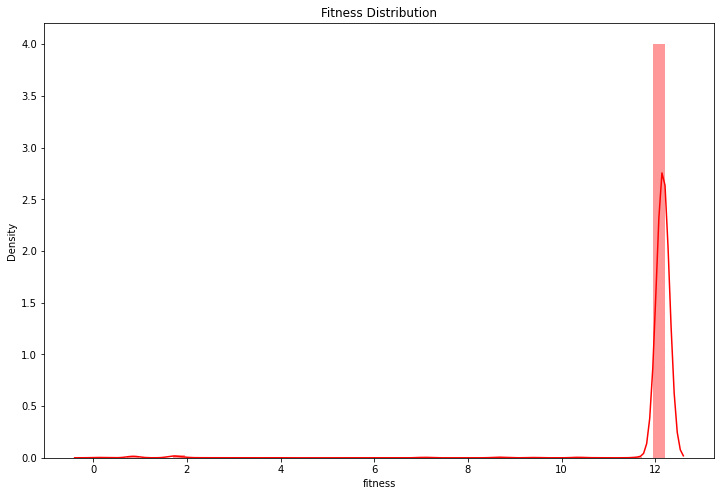

In [23]:
plt.figure(figsize=(12, 8))

sns.distplot(run2['fitness'], 
             color='red')

plt.title('Fitness Distribution')

plt.show()

<Figure size 864x576 with 0 Axes>

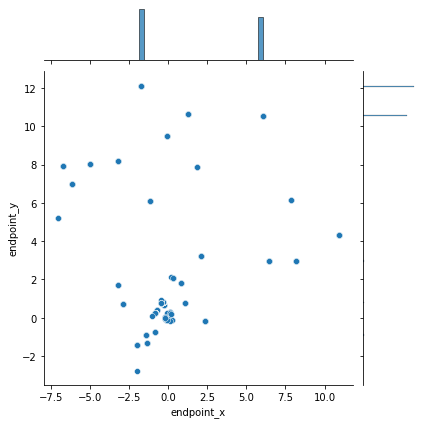

In [24]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2)

plt.show()

<Figure size 864x576 with 0 Axes>

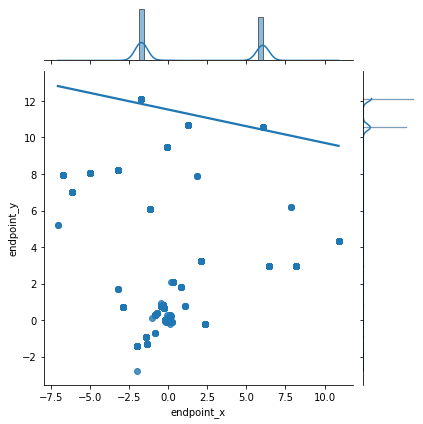

In [25]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='reg')

plt.show()

<Figure size 864x576 with 0 Axes>

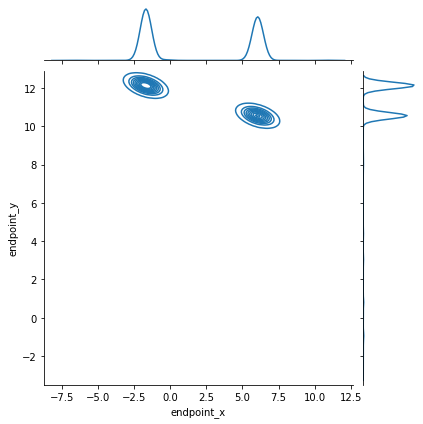

In [26]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='kde')
plt.show()

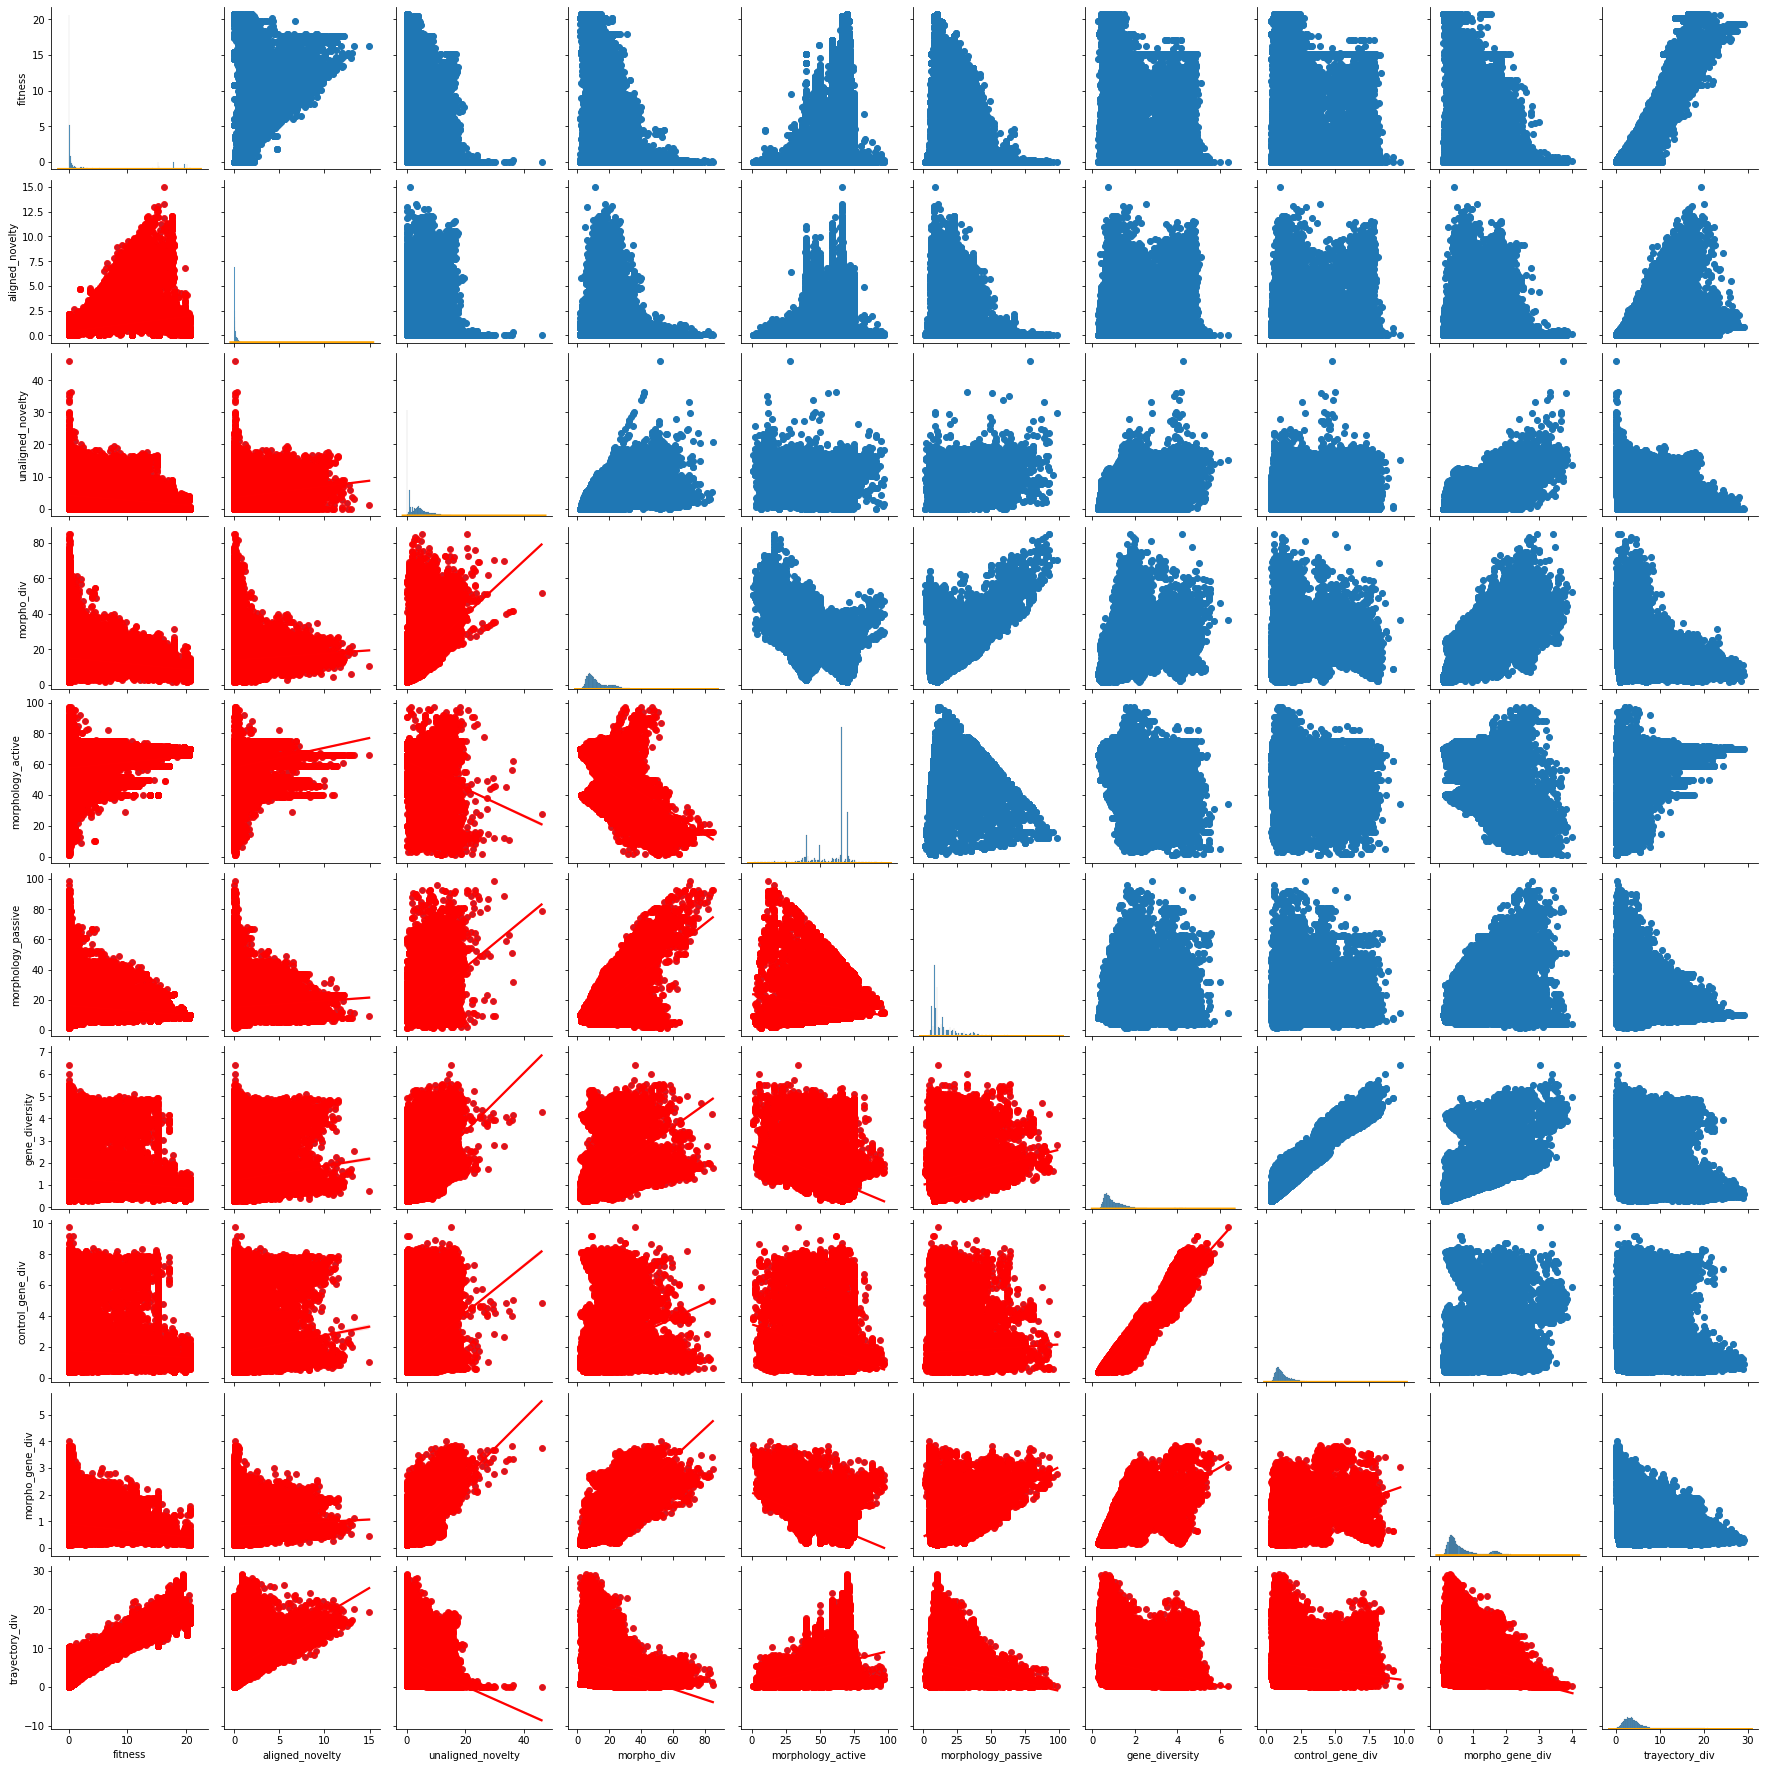

In [22]:
g = sns.pairplot(run2,
        vars=["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"])
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False, color='orange')
g.map_lower(sns.regplot, color='red')
plt.show()

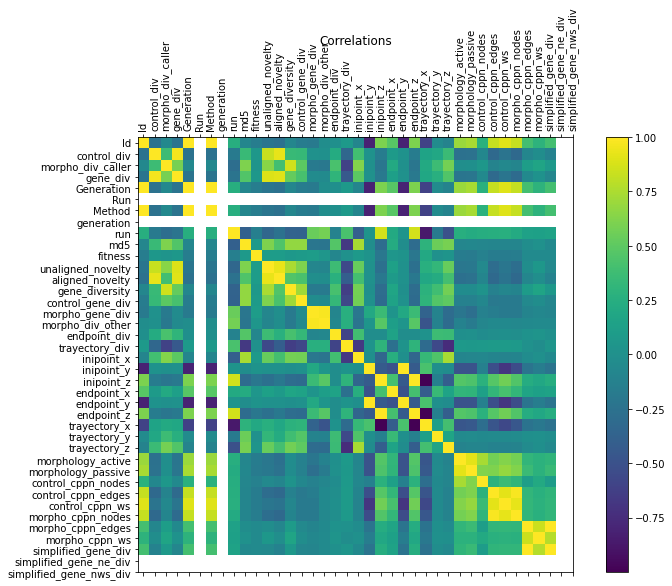

In [29]:
plt.figure(figsize=(12, 8))

plt.matshow(run2.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(run2.columns)

plt.xticks(range(columns), run2.columns)
plt.yticks(range(columns), run2.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [30]:
run2[["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"]].corr()

KeyError: "['morpho_div'] not in index"

In [49]:
d = {'Mean':[], 'Median':[], 'Max':[], 'Generation':[], 'Run':[]}
for j in range(1, 21):
    run_i = grouped_by_run[j - 1]
    for i in range(1, 3001):
        gen_i = run_i[run_i['Generation'] == i]
        fitness = gen_i['fitness'].to_numpy()
        d['Mean'] += [fitness.mean()]
        d['Median'] += [np.median(fitness)]
        d['Max'] += [fitness.max()]
        d['Generation'] += [i]
        d['Run'] += [j]

In [50]:
computed_stats = pd.DataFrame(d)

In [51]:
fitness_stats = computed_stats

In [52]:
#fitness_stats = BodyBrain_stats[BodyBrain_stats['Indicator'] == 'fitness']
fitness_stats.head(10)

,Mean,Median,Max,Generation,Run
0,0.028362,0.021584,0.159811,1,1
1,0.096977,0.036456,0.511659,2,1
2,0.180710,0.103795,0.511659,3,1
3,0.294886,0.235142,0.941239,4,1
4,0.360680,0.323603,0.941239,5,1
5,0.493992,0.475823,0.990969,6,1
6,0.573721,0.511659,0.990969,7,1
7,0.630225,0.570548,0.993111,8,1
8,0.692622,0.613909,1.076206,9,1
9,0.759228,0.681830,1.076206,10,1


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


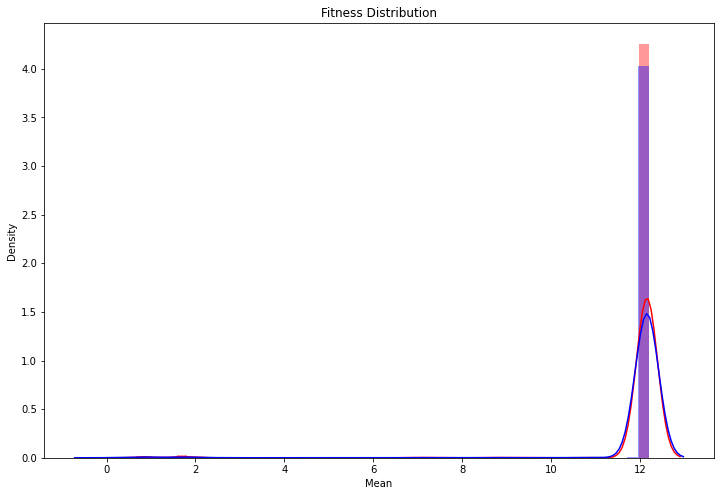

In [54]:
run2 = fitness_stats[fitness_stats['Run'] == 2]

plt.figure(figsize=(12, 8))

sns.distplot(run2['Max'], 
             color='red')

sns.distplot(run2['Mean'], 
             color='blue')

plt.title('Fitness Distribution')

plt.show()

Text(0.5, 1.0, 'Generation')

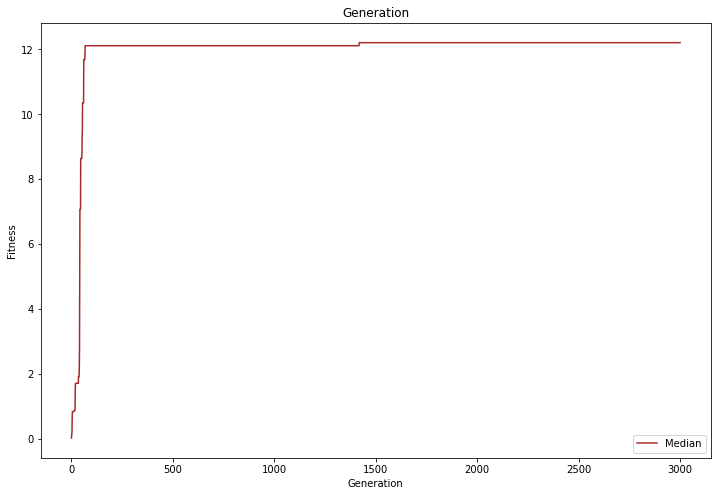

In [55]:
run2.plot(x='Generation', y='Median', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Fitness')
plt.title('Generation')

In [56]:


def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.median(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)



In [58]:
fitness_max_mat = []
fitness_median_mat = []
fitness_mean_mat = []
for i in range(19):
    run_i = fitness_stats[fitness_stats['Run'] == i + 1][:5000]
    fitness_max_mat += [run_i['Max'].tolist()]
    fitness_median_mat += [run_i['Median'].tolist()]
    fitness_mean_mat += [run_i['Mean'].tolist()]
    


In [59]:
fitness_max_mat = np.array(fitness_max_mat)
fitness_median_mat = np.array(fitness_median_mat)
fitness_mean_mat = np.array(fitness_mean_mat)

In [60]:
fitness_max_mat.shape

(19, 3000)

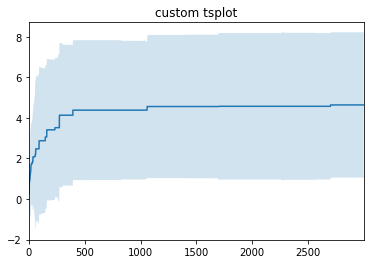

In [61]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

tsplot(ax2, fitness_max_mat)

ax2.set_title("custom tsplot")

plt.show()

In [62]:



def bootstrap(data, n_boot=10000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        boot_dist.append(np.mean(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, data,ci = 68, **kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    cis = bootstrap(data, ci = ci)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

Text(0.5, 1.0, 'custom tsplot bootstrapped')

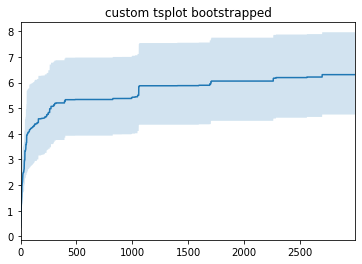

In [66]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

#tsplot(ax, fitness_max_mat)
tsplotboot(ax2, fitness_max_mat[:, :3000], ci=95)
#ax.set_title("custom tsplot")
ax2.set_title("custom tsplot bootstrapped")

In [3]:
pareto_plot = np.array([[-1.81857872e-01, -5.44203700e+01],
       [-1.09865479e-01, -3.76353661e+01],
       [-6.86816755e-02, -4.32262828e+01],
       [-7.56706319e-02, -3.83155649e+01],
       [-2.40783407e-03, -4.97955685e+01],
       [-9.42919415e-02, -2.88027141e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.84176045e-03, -3.28258762e+01],
       [-4.35436653e-02, -2.97728957e+01],
       [-1.56684493e-01, -3.33987600e+01],
       [-4.41154936e-02, -5.87815413e+01],
       [-1.26900164e-01, -5.24887079e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-8.14415198e-03, -3.35656170e+01],
       [-1.11555243e-01, -3.93111248e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.73227366e-02, -4.20198469e+01],
       [-1.86508003e-01, -6.88610416e+01],
       [-1.05595129e-01, -6.59654790e+01]])

In [5]:
ids = np.array([3, 0, 1, 4, 6, 2, 9, 7, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.int64)
[3, 0, 1, 4, 6, 9, 7, 2, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [6]:
pareto_plot = np.column_stack((ids, pareto_plot))

In [7]:
pareto_plot = pd.DataFrame(pareto_plot, columns = ['id', 'fitness', 'novelty'])

In [8]:
pareto_plot

,id,fitness,novelty
0,3.0,-0.181858,-54.420370
1,0.0,-0.109865,-37.635366
2,1.0,-0.068682,-43.226283
3,4.0,-0.075671,-38.315565
4,6.0,-0.002408,-49.795569
5,2.0,-0.094292,-28.802714
6,9.0,-0.087546,-30.281998
7,7.0,-0.050412,-33.138683
8,5.0,-0.007842,-32.825876
9,8.0,-0.043544,-29.772896


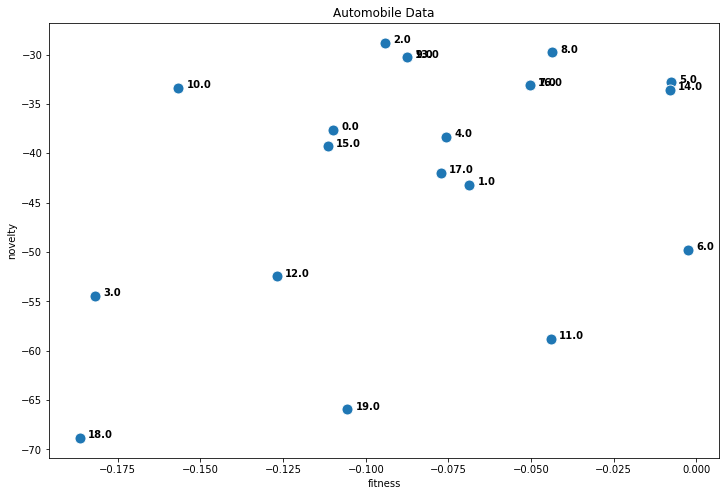

In [9]:
plt.figure(figsize=(12, 8))

p1 = sns.scatterplot(x='fitness', y='novelty', 
                data=pareto_plot, s=120)

for line in range(0,pareto_plot.shape[0]):
     p1.text(pareto_plot.fitness[line]+0.0025, pareto_plot.novelty[line], 
     pareto_plot.id[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Automobile Data')

plt.show()

In [12]:
survivors = pareto_plot.iloc[[18, 0, 19, 10, 12, 11, 2, 15, 17, 4], :]
survivors

,id,fitness,novelty
18,18.0,-0.186508,-68.861042
0,3.0,-0.181858,-54.420370
19,19.0,-0.105595,-65.965479
10,10.0,-0.156684,-33.398760
12,12.0,-0.126900,-52.488708
11,11.0,-0.044115,-58.781541
2,1.0,-0.068682,-43.226283
15,15.0,-0.111555,-39.311125
17,17.0,-0.077323,-42.019847
4,6.0,-0.002408,-49.795569


In [13]:
tournament_indexes = np.array([[6, 5],
       [0, 4],
       [9, 3],
       [8, 2],
       [1, 7],
       [3, 6],
       [7, 5],
       [2, 8],
       [9, 4],
       [1, 0]])

In [16]:
tournament_winners = np.array([5., 0., 9., 2., 1., 3., 5., 2., 4., 0.])

In [17]:
survivors.iloc[tournament_winners, :]

,id,fitness,novelty
11,11.0,-0.044115,-58.781541
18,18.0,-0.186508,-68.861042
4,6.0,-0.002408,-49.795569
19,19.0,-0.105595,-65.965479
0,3.0,-0.181858,-54.420370
10,10.0,-0.156684,-33.398760
11,11.0,-0.044115,-58.781541
19,19.0,-0.105595,-65.965479
12,12.0,-0.126900,-52.488708
18,18.0,-0.186508,-68.861042


In [ ]:
[array([ -0.19000361, -46.33960885]), 
 array([ -0.08229078, -53.23336948]), 
 array([ -0.18730336, -42.0751516 ]), 
 array([ -0.18300995, -46.33960885]), 
 array([-1.29223909e-02, -5.18158565e+01]), 
 array([ -0.17188319, -46.33960885]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.1624015 , -38.02066754]), 
 array([ -0.14479606, -49.13475351]), 
 array([ -0.18099036, -47.61097185]), 
 array([ -0.16056119, -49.13475351]), 
 array([-1.46980045e-03, -5.80607919e+01]), 
 array([ -0.06838493, -67.38136963]), 
 array([ -0.07364034, -51.48698217]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.13552332, -43.60922584]), 
 array([ -0.14049073, -49.13475351]), 
 array([ -0.07647704, -53.51893148])]

In [1]:
[[0.1745799536087905, 54.42037004045381, 0.1290030682916371], [0.10609326883729446, 37.63536606148458, 0.20074988593763374], [0.0796577620325119, 43.226282773327924, 0.11434455465100764], [0.001886117759640692, 49.79556848063127, 0.09085349299056196], [0.09626681129774153, 30.281998259256277, 0.07137179747072088], [0.07436383382880075, 38.315564943463116, 0.0957906055212885], [0.07972661529975145, 28.802714126970297, 0.07188431771291624], [0.054134798284911544, 33.13868351127313, 0.07824960991358688], [0.008206027818623974, 32.82587619434412, 0.07151423339485782], [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

[[0.1745799536087905, 54.42037004045381, 0.1290030682916371],
 [0.10609326883729446, 37.63536606148458, 0.20074988593763374],
 [0.0796577620325119, 43.226282773327924, 0.11434455465100764],
 [0.001886117759640692, 49.79556848063127, 0.09085349299056196],
 [0.09626681129774153, 30.281998259256277, 0.07137179747072088],
 [0.07436383382880075, 38.315564943463116, 0.0957906055212885],
 [0.07972661529975145, 28.802714126970297, 0.07188431771291624],
 [0.054134798284911544, 33.13868351127313, 0.07824960991358688],
 [0.008206027818623974, 32.82587619434412, 0.07151423339485782],
 [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

In [2]:
[[0.1745799536087905, 38.422598964092586, 0.1015109247879249], [0.10609326883729446, 27.44048759983132, 0.16508518277566595], [0.0796577620325119, 30.3297765312161, 0.09300718489977867], [0.001886117759640692, 38.53554647545725, 0.07216547467624573], [0.09626681129774153, 19.425894753866817, 0.057052528022613694], [0.07436383382880075, 27.316762654613107, 0.08337605965697106], [0.07972661529975145, 19.71638870642372, 0.058746200822718794], [0.054134798284911544, 23.313816981475405, 0.06619935706110809], [0.008206027818623974, 21.119866034703364, 0.0571601274708769], [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

[[0.1745799536087905, 38.422598964092586, 0.1015109247879249],
 [0.10609326883729446, 27.44048759983132, 0.16508518277566595],
 [0.0796577620325119, 30.3297765312161, 0.09300718489977867],
 [0.001886117759640692, 38.53554647545725, 0.07216547467624573],
 [0.09626681129774153, 19.425894753866817, 0.057052528022613694],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106],
 [0.07972661529975145, 19.71638870642372, 0.058746200822718794],
 [0.054134798284911544, 23.313816981475405, 0.06619935706110809],
 [0.008206027818623974, 21.119866034703364, 0.0571601274708769],
 [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

In [3]:
[[0.18106390712030845, 38.422598964092586, 0.11167156463953791], [0.06557151817724394, 19.425894753866817, 0.06380974949081243], [0.12760615365963185, 21.588165482134986, 0.0822409969652915], [0.05415832740129964, 20.20609320634022, 0.09870898402233927], [0.007357861276525066, 21.119866034703364, 0.05711189068701966], [0.1112125401388089, 29.557427996172596, 0.1704897453225194], [0.09665016161184178, 19.71638870642372, 0.056966782203714636], [0.08210770100005006, 30.3297765312161, 0.0949991653904494], [0.044335347456731504, 22.167387244957084, 0.09252863727439026], [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]

[[0.18106390712030845, 38.422598964092586, 0.11167156463953791],
 [0.06557151817724394, 19.425894753866817, 0.06380974949081243],
 [0.12760615365963185, 21.588165482134986, 0.0822409969652915],
 [0.05415832740129964, 20.20609320634022, 0.09870898402233927],
 [0.007357861276525066, 21.119866034703364, 0.05711189068701966],
 [0.1112125401388089, 29.557427996172596, 0.1704897453225194],
 [0.09665016161184178, 19.71638870642372, 0.056966782203714636],
 [0.08210770100005006, 30.3297765312161, 0.0949991653904494],
 [0.044335347456731504, 22.167387244957084, 0.09252863727439026],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]